In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## About Output

There are two main classifications of tumors. One is known as benign and the other as malignant. A benign tumor is a tumor that does not invade its surrounding tissue or spread around the body. A malignant tumor is a tumor that may invade its surrounding tissue or spread around the body.

## Exploratory Data Analysis

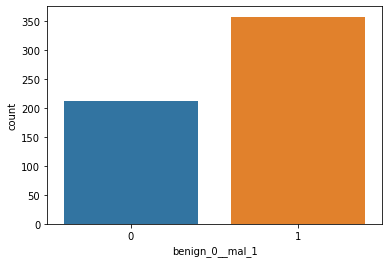

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)

The above Plot shows out of 569 Patients,there are more patients suffering from malignant tumor.

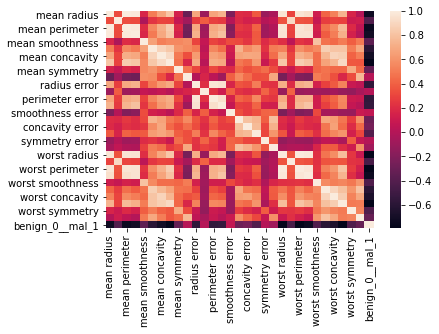

In [7]:
sns.heatmap(df.corr())

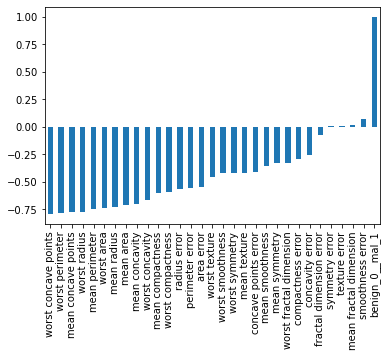

In [8]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind = 'bar')

## Train Test Split

In [9]:
X = df.drop('benign_0__mal_1',axis = 1).values
Y = df['benign_0__mal_1'].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=101)

## Scaling Data

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
sc_X = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Creating a Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout

In [15]:
model = Sequential()

In [16]:
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy')

## Train a Model

In [17]:
model.fit(x = X_train,y = Y_train,epochs = 600,validation_data=(X_test,Y_test),verbose=1)

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.6837 - val_loss: 0.6635
Epoch 2/600
426/426 [==============================] - 0s 208us/sample - loss: 0.6454 - val_loss: 0.6286
Epoch 3/600
426/426 [==============================] - 0s 195us/sample - loss: 0.6075 - val_loss: 0.5875
Epoch 4/600
426/426 [==============================] - 0s 195us/sample - loss: 0.5676 - val_loss: 0.5485
Epoch 5/600
426/426 [==============================] - 0s 196us/sample - loss: 0.5276 - val_loss: 0.5033
Epoch 6/600
426/426 [==============================] - 0s 200us/sample - loss: 0.4832 - val_loss: 0.4593
Epoch 7/600
426/426 [==============================] - 0s 190us/sample - loss: 0.4396 - val_loss: 0.4113
Epoch 8/600
426/426 [==============================] - 0s 159us/sample - loss: 0.3943 - val_loss: 0.3670
Epoch 9/600
426/426 [==============================] - 0s 196us/sample - loss: 0.3528 - val_loss: 0.3230
Epoch 10/60

426/426 [==============================] - 0s 49us/sample - loss: 0.0520 - val_loss: 0.1079
Epoch 79/600
426/426 [==============================] - 0s 46us/sample - loss: 0.0517 - val_loss: 0.1097
Epoch 80/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0523 - val_loss: 0.1130
Epoch 81/600
426/426 [==============================] - 0s 46us/sample - loss: 0.0569 - val_loss: 0.1065
Epoch 82/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0547 - val_loss: 0.1117
Epoch 83/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0512 - val_loss: 0.1174
Epoch 84/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0508 - val_loss: 0.1066
Epoch 85/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0507 - val_loss: 0.1193
Epoch 86/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0511 - val_loss: 0.1084
Epoch 87/600
426/426 [==============================] - 0s 46us/samp

426/426 [==============================] - 0s 47us/sample - loss: 0.0423 - val_loss: 0.1175
Epoch 156/600
426/426 [==============================] - 0s 48us/sample - loss: 0.0474 - val_loss: 0.1341
Epoch 157/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0436 - val_loss: 0.1218
Epoch 158/600
426/426 [==============================] - 0s 44us/sample - loss: 0.0419 - val_loss: 0.1281
Epoch 159/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0398 - val_loss: 0.1206
Epoch 160/600
426/426 [==============================] - 0s 48us/sample - loss: 0.0402 - val_loss: 0.1237
Epoch 161/600
426/426 [==============================] - 0s 46us/sample - loss: 0.0397 - val_loss: 0.1252
Epoch 162/600
426/426 [==============================] - 0s 46us/sample - loss: 0.0404 - val_loss: 0.1248
Epoch 163/600
426/426 [==============================] - 0s 46us/sample - loss: 0.0415 - val_loss: 0.1371
Epoch 164/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 43us/sample - loss: 0.0341 - val_loss: 0.1350
Epoch 233/600
426/426 [==============================] - 0s 46us/sample - loss: 0.0348 - val_loss: 0.1368
Epoch 234/600
426/426 [==============================] - 0s 44us/sample - loss: 0.0341 - val_loss: 0.1383
Epoch 235/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0391 - val_loss: 0.1494
Epoch 236/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0354 - val_loss: 0.1423
Epoch 237/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0335 - val_loss: 0.1312
Epoch 238/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0345 - val_loss: 0.1381
Epoch 239/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0357 - val_loss: 0.1469
Epoch 240/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0344 - val_loss: 0.1453
Epoch 241/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 54us/sample - loss: 0.0310 - val_loss: 0.1764
Epoch 310/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0294 - val_loss: 0.1508
Epoch 311/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0318 - val_loss: 0.1615
Epoch 312/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0303 - val_loss: 0.1554
Epoch 313/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0288 - val_loss: 0.1588
Epoch 314/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0291 - val_loss: 0.1522
Epoch 315/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0296 - val_loss: 0.1537
Epoch 316/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0288 - val_loss: 0.1548
Epoch 317/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0290 - val_loss: 0.1561
Epoch 318/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 47us/sample - loss: 0.0264 - val_loss: 0.1635
Epoch 387/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0294 - val_loss: 0.1772
Epoch 388/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0296 - val_loss: 0.1990
Epoch 389/600
426/426 [==============================] - 0s 43us/sample - loss: 0.0342 - val_loss: 0.1628
Epoch 390/600
426/426 [==============================] - 0s 46us/sample - loss: 0.0260 - val_loss: 0.1786
Epoch 391/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0275 - val_loss: 0.1811
Epoch 392/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0247 - val_loss: 0.1835
Epoch 393/600
426/426 [==============================] - 0s 48us/sample - loss: 0.0250 - val_loss: 0.1834
Epoch 394/600
426/426 [==============================] - 0s 48us/sample - loss: 0.0249 - val_loss: 0.1643
Epoch 395/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 48us/sample - loss: 0.0253 - val_loss: 0.2132
Epoch 464/600
426/426 [==============================] - 0s 46us/sample - loss: 0.0219 - val_loss: 0.1925
Epoch 465/600
426/426 [==============================] - 0s 44us/sample - loss: 0.0211 - val_loss: 0.2188
Epoch 466/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0214 - val_loss: 0.1858
Epoch 467/600
426/426 [==============================] - 0s 46us/sample - loss: 0.0249 - val_loss: 0.2361
Epoch 468/600
426/426 [==============================] - 0s 46us/sample - loss: 0.0249 - val_loss: 0.2022
Epoch 469/600
426/426 [==============================] - 0s 46us/sample - loss: 0.0265 - val_loss: 0.1889
Epoch 470/600
426/426 [==============================] - 0s 46us/sample - loss: 0.0244 - val_loss: 0.2140
Epoch 471/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0248 - val_loss: 0.1920
Epoch 472/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 48us/sample - loss: 0.0241 - val_loss: 0.2034
Epoch 541/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0183 - val_loss: 0.2474
Epoch 542/600
426/426 [==============================] - 0s 46us/sample - loss: 0.0211 - val_loss: 0.2239
Epoch 543/600
426/426 [==============================] - 0s 50us/sample - loss: 0.0182 - val_loss: 0.2262
Epoch 544/600
426/426 [==============================] - 0s 46us/sample - loss: 0.0184 - val_loss: 0.2331
Epoch 545/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0218 - val_loss: 0.2262
Epoch 546/600
426/426 [==============================] - 0s 46us/sample - loss: 0.0215 - val_loss: 0.2207
Epoch 547/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0267 - val_loss: 0.2390
Epoch 548/600
426/426 [==============================] - 0s 48us/sample - loss: 0.0172 - val_loss: 0.2275
Epoch 549/600
426/426 [==============================] - 0s 

In [18]:
#model.history.history

In [19]:
model_loss = pd.DataFrame(model.history.history)

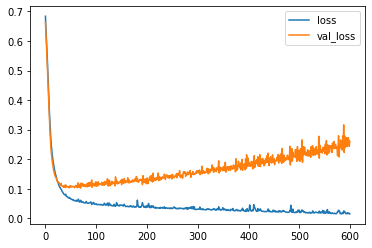

In [20]:
model_loss.plot()

This let to overfitting

### Early Stopping
We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [21]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [24]:
model.fit(X_train,Y_train,epochs=600,validation_data=(X_test,Y_test),
         verbose=1,callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 822us/sample - loss: 0.6593 - val_loss: 0.6395
Epoch 2/600
426/426 [==============================] - 0s 71us/sample - loss: 0.6283 - val_loss: 0.6104
Epoch 3/600
426/426 [==============================] - 0s 59us/sample - loss: 0.5949 - val_loss: 0.5759
Epoch 4/600
426/426 [==============================] - 0s 56us/sample - loss: 0.5620 - val_loss: 0.5397
Epoch 5/600
426/426 [==============================] - 0s 56us/sample - loss: 0.5279 - val_loss: 0.5044
Epoch 6/600
426/426 [==============================] - 0s 56us/sample - loss: 0.4913 - val_loss: 0.4665
Epoch 7/600
426/426 [==============================] - 0s 52us/sample - loss: 0.4545 - val_loss: 0.4265
Epoch 8/600
426/426 [==============================] - 0s 56us/sample - loss: 0.4167 - val_loss: 0.3894
Epoch 9/600
426/426 [==============================] - 0s 49us/sample - loss: 0.3809 - val_loss: 0.3514
Epoch 10/600
426/

426/426 [==============================] - 0s 48us/sample - loss: 0.0538 - val_loss: 0.1140
Epoch 79/600
426/426 [==============================] - 0s 46us/sample - loss: 0.0550 - val_loss: 0.1165
Epoch 80/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0530 - val_loss: 0.1128
Epoch 81/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0524 - val_loss: 0.1085
Epoch 82/600
426/426 [==============================] - 0s 46us/sample - loss: 0.0530 - val_loss: 0.1131
Epoch 83/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0517 - val_loss: 0.1112
Epoch 84/600
426/426 [==============================] - 0s 46us/sample - loss: 0.0538 - val_loss: 0.1141
Epoch 85/600
426/426 [==============================] - 0s 46us/sample - loss: 0.0532 - val_loss: 0.1147
Epoch 86/600
426/426 [==============================] - 0s 44us/sample - loss: 0.0529 - val_loss: 0.1122
Epoch 87/600
426/426 [==============================] - 0s 46us/samp

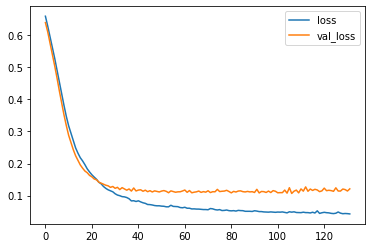

In [25]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [26]:
from tensorflow.keras.layers import Dropout

In [27]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [28]:
model.fit(x=X_train, 
          y=Y_train, 
          epochs=600,
          validation_data=(X_test, Y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 910us/sample - loss: 0.7384 - val_loss: 0.6662
Epoch 2/600
426/426 [==============================] - 0s 60us/sample - loss: 0.6936 - val_loss: 0.6471
Epoch 3/600
426/426 [==============================] - 0s 50us/sample - loss: 0.6584 - val_loss: 0.6227
Epoch 4/600
426/426 [==============================] - 0s 59us/sample - loss: 0.6285 - val_loss: 0.5874
Epoch 5/600
426/426 [==============================] - 0s 82us/sample - loss: 0.6039 - val_loss: 0.5540
Epoch 6/600
426/426 [==============================] - 0s 70us/sample - loss: 0.5859 - val_loss: 0.5219
Epoch 7/600
426/426 [==============================] - 0s 53us/sample - loss: 0.5600 - val_loss: 0.4917
Epoch 8/600
426/426 [==============================] - 0s 55us/sample - loss: 0.5197 - val_loss: 0.4627
Epoch 9/600
426/426 [==============================] - 0s 52us/sample - loss: 0.5027 - val_loss: 0.4318
Epoch 10/600
426/

426/426 [==============================] - 0s 54us/sample - loss: 0.1050 - val_loss: 0.0920
Epoch 79/600
426/426 [==============================] - 0s 51us/sample - loss: 0.1144 - val_loss: 0.0935
Epoch 80/600
426/426 [==============================] - 0s 55us/sample - loss: 0.1282 - val_loss: 0.0890
Epoch 81/600
426/426 [==============================] - 0s 49us/sample - loss: 0.1049 - val_loss: 0.0906
Epoch 82/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0990 - val_loss: 0.0913
Epoch 83/600
426/426 [==============================] - 0s 50us/sample - loss: 0.1096 - val_loss: 0.0979
Epoch 84/600
426/426 [==============================] - 0s 49us/sample - loss: 0.1240 - val_loss: 0.0934
Epoch 85/600
426/426 [==============================] - 0s 54us/sample - loss: 0.1260 - val_loss: 0.0881
Epoch 86/600
426/426 [==============================] - 0s 52us/sample - loss: 0.1088 - val_loss: 0.0930
Epoch 87/600
426/426 [==============================] - 0s 55us/samp

426/426 [==============================] - 0s 63us/sample - loss: 0.0679 - val_loss: 0.0966
Epoch 156/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0784 - val_loss: 0.0852
Epoch 157/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0759 - val_loss: 0.1011
Epoch 158/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0763 - val_loss: 0.0926
Epoch 159/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0711 - val_loss: 0.0962
Epoch 160/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0902 - val_loss: 0.0839
Epoch 161/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0839 - val_loss: 0.0829
Epoch 162/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0798 - val_loss: 0.0961
Epoch 163/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0785 - val_loss: 0.0833
Epoch 164/600
426/426 [==============================] - 0s 

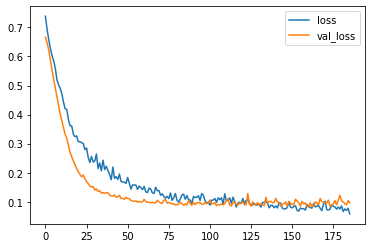

In [29]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [30]:
predictions = model.predict_classes(X_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [32]:
print(confusion_matrix(Y_test,predictions))

[[54  1]
 [ 2 86]]


## Creating the Tensorboard Callback

TensorBoard is a visualization tool provided with TensorFlow.

This callback logs events for TensorBoard, including:
* Metrics summary plots
* Training graph visualization
* Activation histograms
* Sampled profiling

If you have installed TensorFlow with pip, you should be able
to launch TensorBoard from the command line:

```sh
tensorboard --logdir=path_to_your_logs
```

You can find more information about TensorBoard
[here](https://www.tensorflow.org/tensorboard/).

    Arguments:
        log_dir: the path of the directory where to save the log files to be
          parsed by TensorBoard.
        histogram_freq: frequency (in epochs) at which to compute activation and
          weight histograms for the layers of the model. If set to 0, histograms
          won't be computed. Validation data (or split) must be specified for
          histogram visualizations.
        write_graph: whether to visualize the graph in TensorBoard. The log file
          can become quite large when write_graph is set to True.
        write_images: whether to write model weights to visualize as image in
          TensorBoard.
        update_freq: `'batch'` or `'epoch'` or integer. When using `'batch'`,
          writes the losses and metrics to TensorBoard after each batch. The same
          applies for `'epoch'`. If using an integer, let's say `1000`, the
          callback will write the metrics and losses to TensorBoard every 1000
          samples. Note that writing too frequently to TensorBoard can slow down
          your training.
        profile_batch: Profile the batch to sample compute characteristics. By
          default, it will profile the second batch. Set profile_batch=0 to
          disable profiling. Must run in TensorFlow eager mode.
        embeddings_freq: frequency (in epochs) at which embedding layers will
          be visualized. If set to 0, embeddings won't be visualized.
       

In [33]:
pwd

'C:\\Users\\mohda\\Deep Learning Practice notebook'

In [34]:
from tensorflow.keras.callbacks import TensorBoard

In [35]:
log_directory = 'logs\\fit'
board = TensorBoard(log_dir=log_directory,histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=1)

In [36]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [38]:
model.fit(x=X_train, 
          y=Y_train, 
          epochs=600,
          validation_data=(X_test, Y_test), verbose=1,
          callbacks=[early_stop,board]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.7062 - val_loss: 0.6655
Epoch 2/600
426/426 [==============================] - 0s 166us/sample - loss: 0.6720 - val_loss: 0.6574
Epoch 3/600
426/426 [==============================] - 0s 142us/sample - loss: 0.6739 - val_loss: 0.6494
Epoch 4/600
426/426 [==============================] - 0s 132us/sample - loss: 0.6558 - val_loss: 0.6387
Epoch 5/600
426/426 [==============================] - 0s 156us/sample - loss: 0.6372 - val_loss: 0.6283
Epoch 6/600
426/426 [==============================] - 0s 154us/sample - loss: 0.6308 - val_loss: 0.6017
Epoch 7/600
426/426 [==============================] - 0s 146us/sample - loss: 0.6097 - val_loss: 0.5768
Epoch 8/600
426/426 [==============================] - 0s 139us/sample - loss: 0.6039 - val_loss: 0.5632
Epoch 9/600
426/426 [==============================] - 0s 143us/sample - loss: 0.6002 - val_loss: 0.5383
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 141us/sample - loss: 0.1316 - val_loss: 0.0868
Epoch 79/600
426/426 [==============================] - 0s 155us/sample - loss: 0.1335 - val_loss: 0.0956
Epoch 80/600
426/426 [==============================] - 0s 166us/sample - loss: 0.1115 - val_loss: 0.0927
Epoch 81/600
426/426 [==============================] - 0s 171us/sample - loss: 0.1213 - val_loss: 0.1006
Epoch 82/600
426/426 [==============================] - 0s 186us/sample - loss: 0.1163 - val_loss: 0.0826
Epoch 83/600
426/426 [==============================] - 0s 185us/sample - loss: 0.1232 - val_loss: 0.0855
Epoch 84/600
426/426 [==============================] - 0s 112us/sample - loss: 0.1236 - val_loss: 0.0826
Epoch 85/600
426/426 [==============================] - 0s 176us/sample - loss: 0.0993 - val_loss: 0.0982
Epoch 86/600
426/426 [==============================] - 0s 171us/sample - loss: 0.1223 - val_loss: 0.0944
Epoch 87/600
426/426 [========================

### Running Tensorboard

Use cd at your command line to change directory to the file path reported back by pwd or your current .py file location.
Then run this code at your command line or terminal

tensorboard --logdir logs\fit 


Tensorboard will run locally in your browser at http://localhost:6006/